In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import chi2,norm,normaltest
from skimage.filters import threshold_otsu, threshold_yen, threshold_li
from helpers import *

# How to detect changes by using thresholds

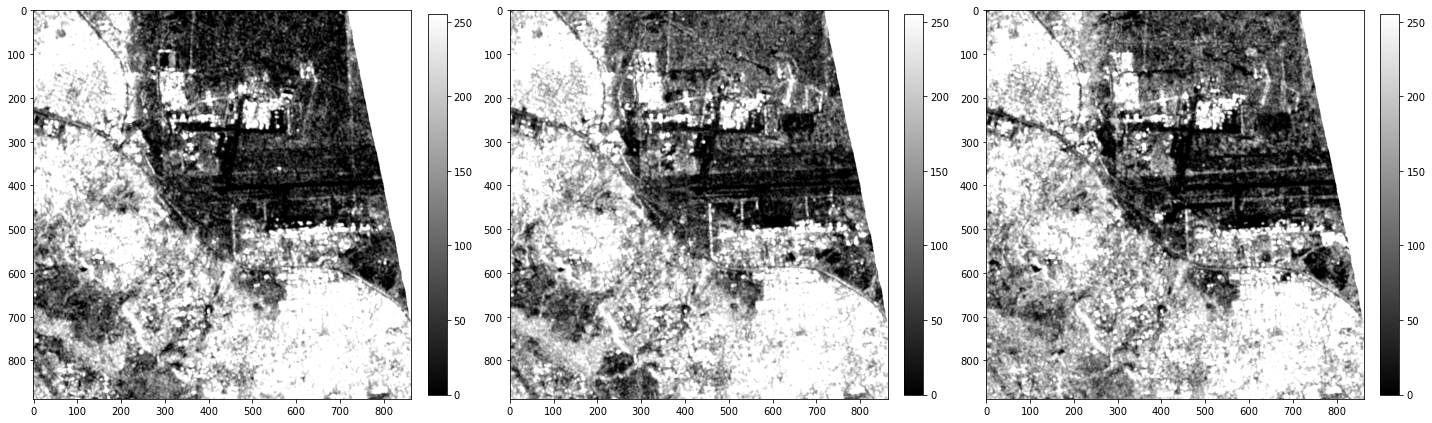

In [2]:
#Visualize temporal serie and see differences
img_data1=load_image('data/backscatterNiamey20180130.tif')
img_data2=load_image('data/backscatterNiamey20180611.tif')
img_data3=load_image('data/backscatterNiamey20180927.tif')
layers = []
layers.append(img_data1)
layers.append(img_data2)
layers.append(img_data3)
image = np.dstack(layers)
plot_bands_row(image, colormap=True)

# Compute of difference image
Backscatter1 - Backscatter2

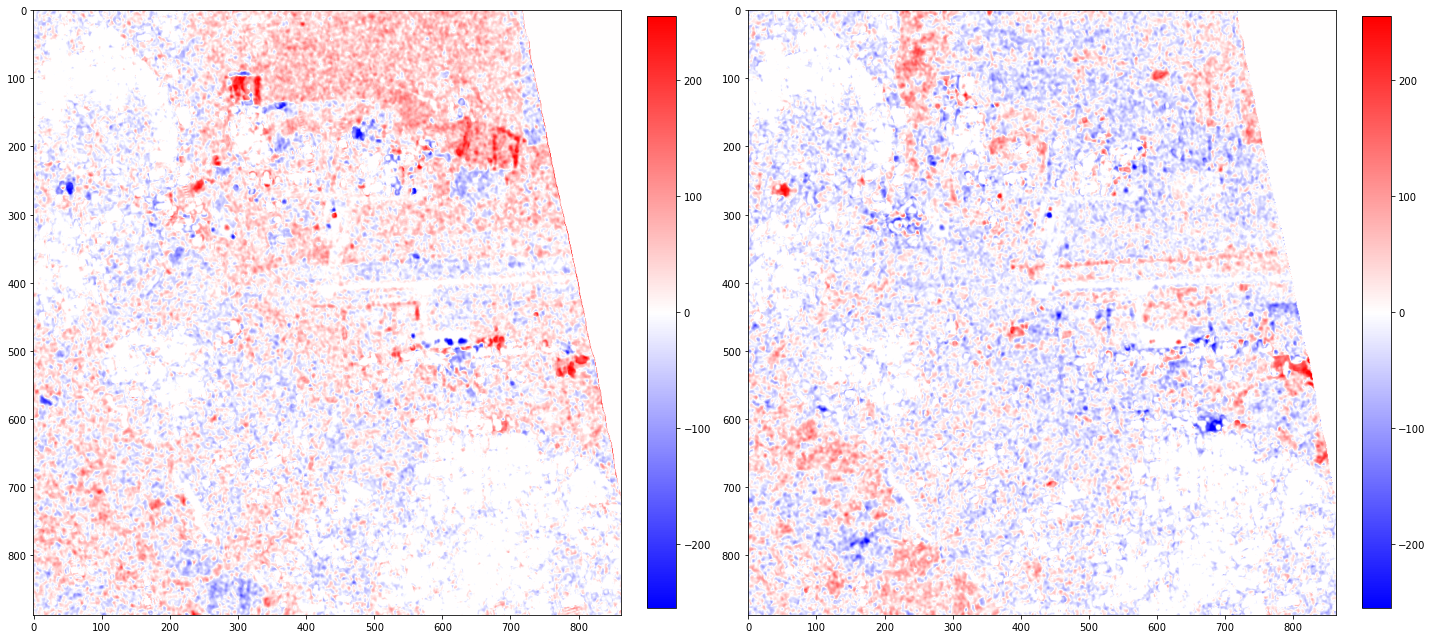

In [4]:
#How to visualize changes
diff=img_data2[:,:,0].astype(np.int32)-img_data1[:,:,0].astype(np.int32)
diff2=img_data3[:,:,0].astype(np.int32)-img_data2[:,:,0].astype(np.int32)
layersDiff = []
layersDiff.append(diff)
layersDiff.append(diff2)
imageDiff = np.dstack(layersDiff)
plot_bands_row(imageDiff,vmin=-255,vmax=255,cmap=plt.cm.bwr, colormap=True)

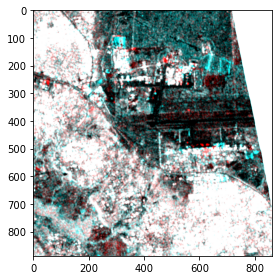

In [5]:
#RGB generation
plot_rgb(img_data1,img_data2,img_data2)

# Thresholds 
The pixels whose differences is lower than a certain min_threshold or higher than the upper_threshold can be considered change.

How this threshold can be computed?
Is the same threshold valid for all the areas?
Are the thresholds the same for a time serie of images?

## User defined threshold

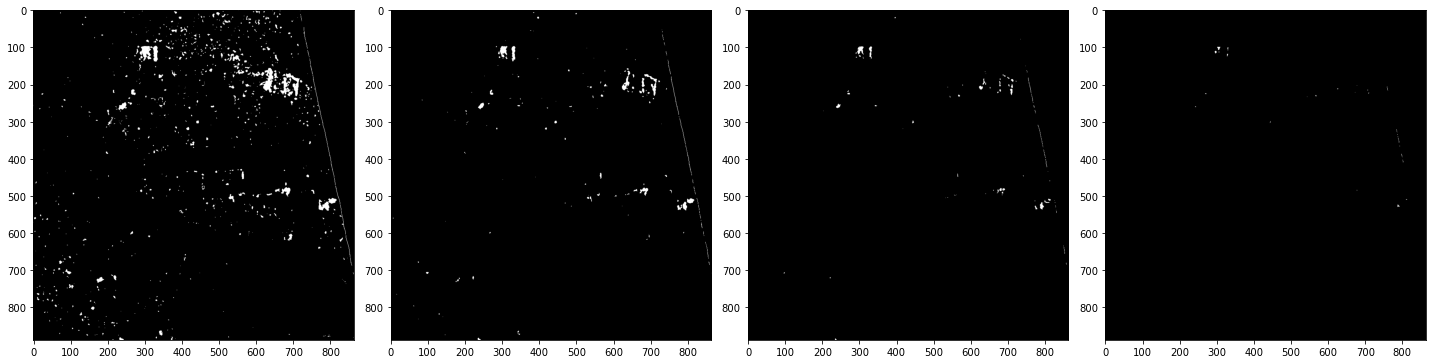

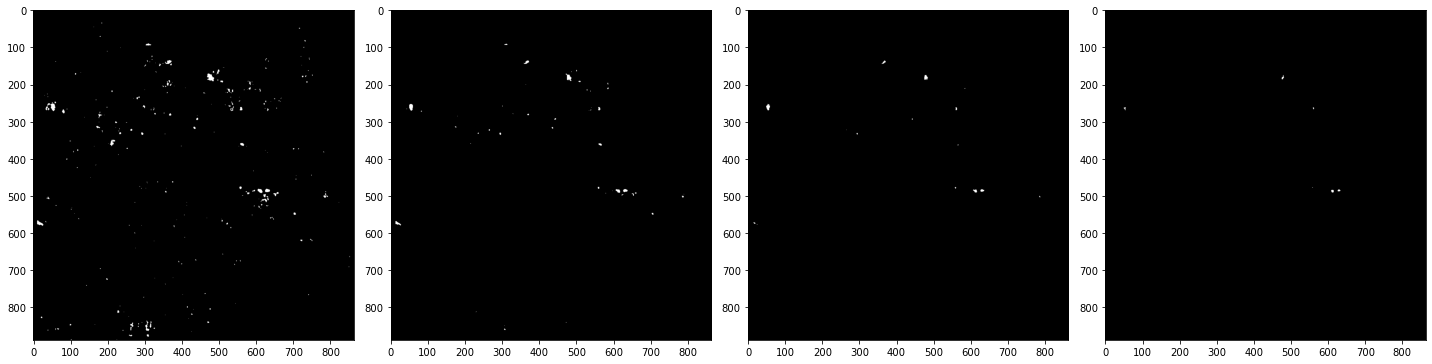

In [16]:
# Positive changes
#maskedDiff50 = ma.masked_where(diff>50, diff)
maskedDiff100 = ma.masked_where(diff>100, diff)
maskedDiff150 = ma.masked_where(diff>150, diff)
maskedDiff200 = ma.masked_where(diff>200, diff)
maskedDiff250 = ma.masked_where(diff>250, diff)
layers = []
#layers.append(maskedDiff50.mask)
layers.append(maskedDiff100.mask)
layers.append(maskedDiff150.mask)
layers.append(maskedDiff200.mask)
layers.append(maskedDiff250.mask)
image = np.dstack(layers)
plot_bands_row(image,vmin=0,vmax=1)

#Negative changes
#maskedDiff50 = ma.masked_where(diff<-50, diff)
maskedDiff100 = ma.masked_where(diff<-100, diff)
maskedDiff150 = ma.masked_where(diff<-150, diff)
maskedDiff200 = ma.masked_where(diff<-200, diff)
maskedDiff250 = ma.masked_where(diff<-250, diff)
layers = []
#layers.append(maskedDiff50.mask)
layers.append(maskedDiff100.mask)
layers.append(maskedDiff150.mask)
layers.append(maskedDiff200.mask)
layers.append(maskedDiff250.mask)
image = np.dstack(layers)
plot_bands_row(image,vmin=0,vmax=1)


In [ ]:
#Another way to visualize changes with both min and max thresholds
mask = np.zeros(diff.shape).astype(np.uint8)
mask = np.logical_or(np.logical_or(diff>200,diff<(0-200)),mask)
plot_bands_row(mask,vmin=0,vmax=1)

## Exercise: find some thresholds to be able to distinguish:
* New constructions in Charpiya
* Flooding areas in Charpiya
* Burned Areas in Amazonas

## Automatic threshold computation

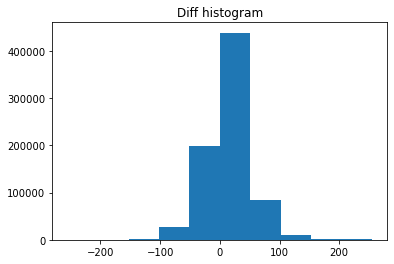

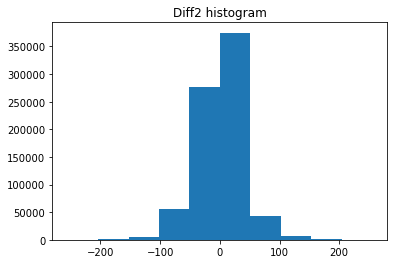

In [19]:
# Lets have a look to the histogram of the diff images in Niamey

plt.hist(diff.flatten()) 
plt.title("Diff histogram") 
plt.show()

plt.hist(diff2.flatten()) 
plt.title("Diff2 histogram") 
plt.show()

We can consider that the diff value, if no changes, would be similar to a gaussian distribution. Ideally it would have mean = 0, but it depends on:
* acquisition conditions
* preprocessing of images (e.g. data conversion...)

With this approach we can compute with the level of statistical significance that we want, the values that are 'anomalies'

Mean diff: 9.263123349305273
Std diff: 39.07509475617133
Normalized Error: 4.753424308822899
Error: 195.00362863284823


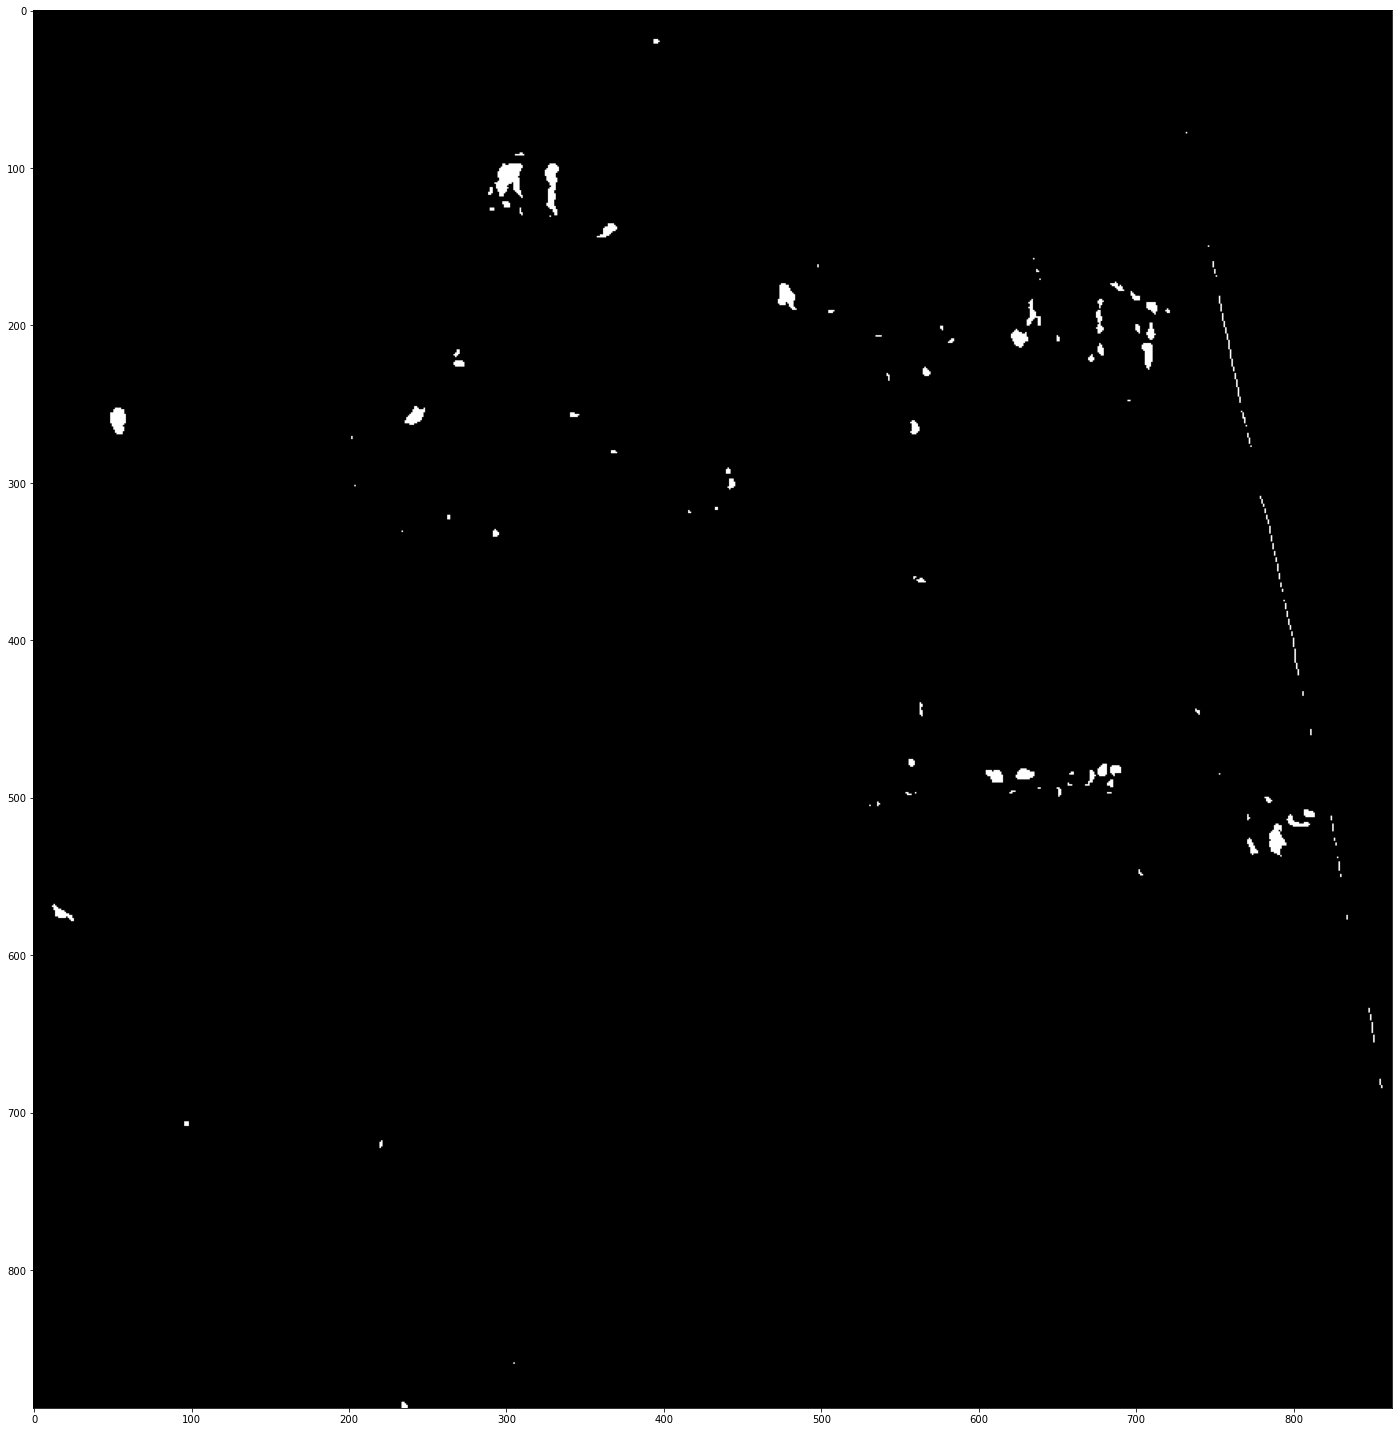

In [32]:
# statistical threshold (normal, chi2...)
#Normalize diff
std=np.std(diff)
mean=np.mean(diff)
diffNorm=(diff-mean)/std
print('Mean diff: ' +str(mean))
print('Std diff: ' +str(std))
#print(diffNorm)

error1=norm.isf(0.000001)
print('Normalized Error: ' +str(error1))
print('Error: ' +str(error1*std+mean))

mask = np.zeros(diff.shape).astype(np.uint8)
mask = np.logical_or(np.logical_or(diffNorm>error1,diffNorm<(0-error1)),mask)
plot_bands_row(mask,vmin=0,vmax=1)

## Exercise: Apply same method to difference at date 2 in Niamey
* Is it OK to use the same threshold?

130


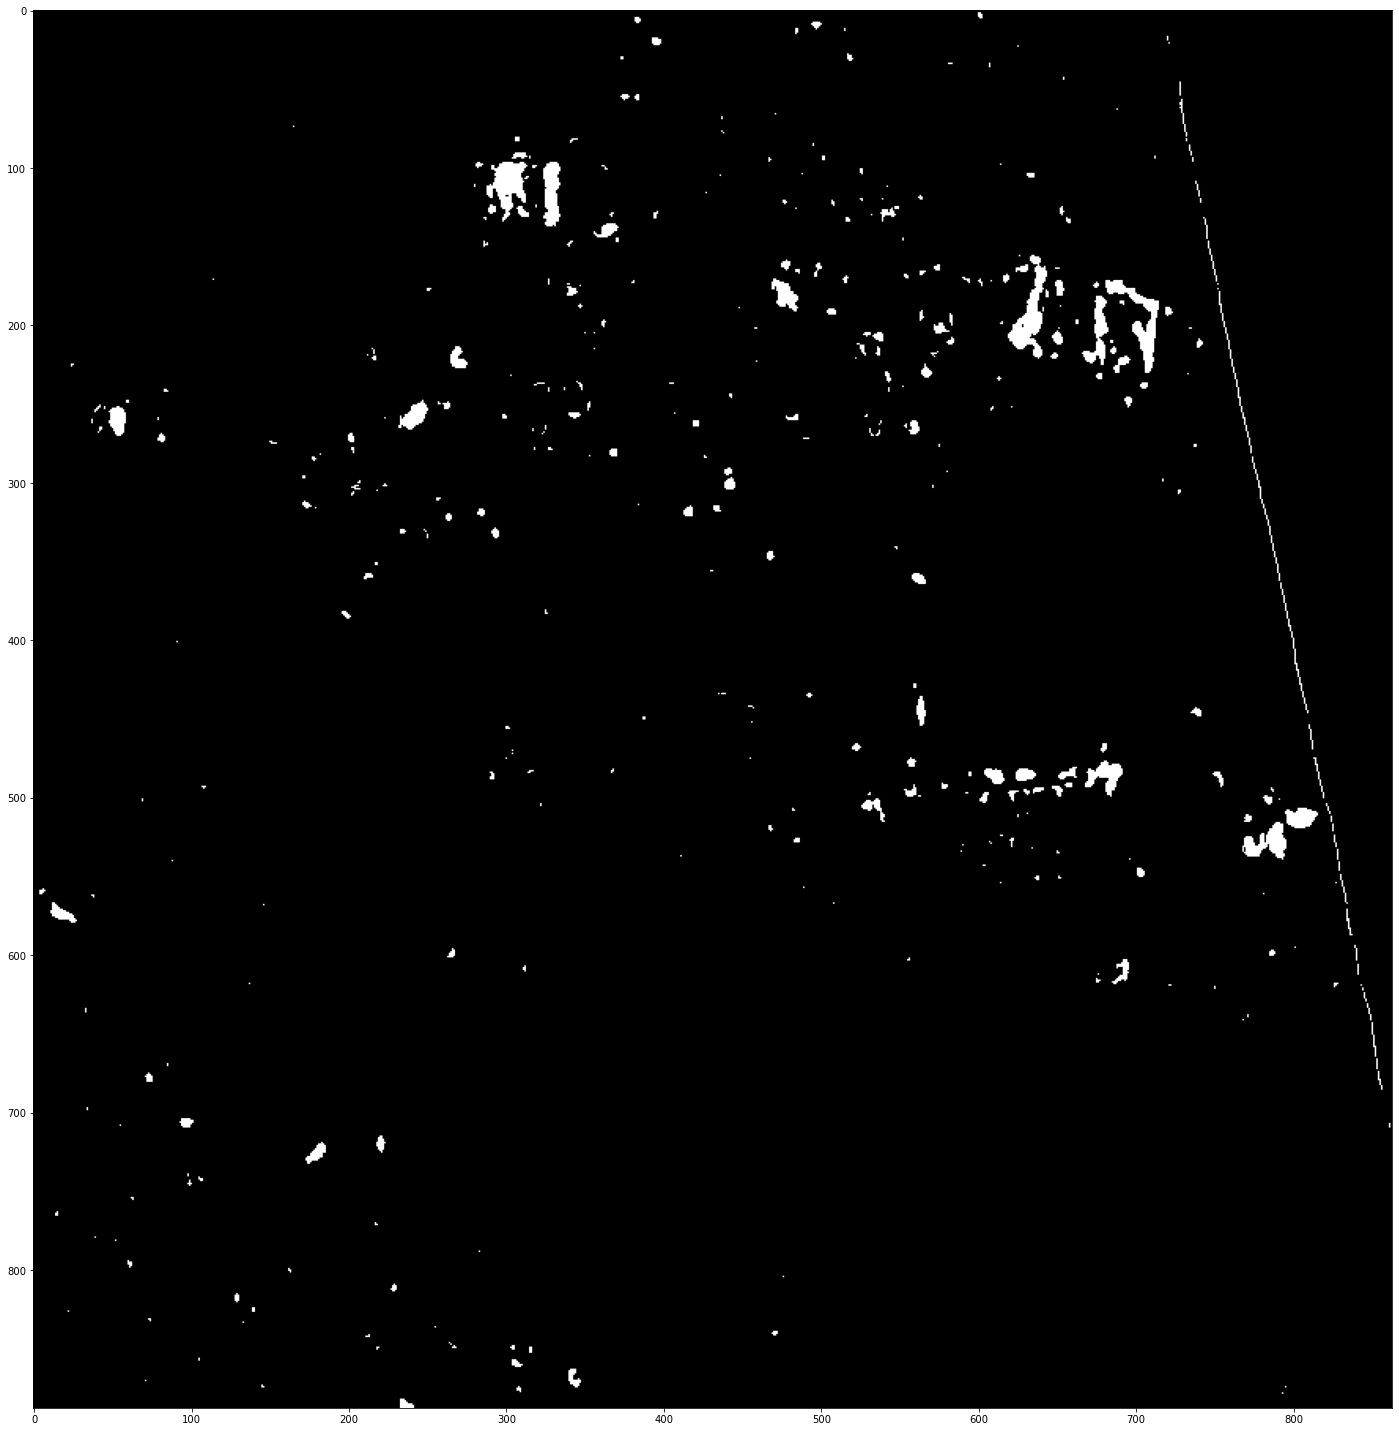

In [14]:
#other standards thresholds
yen=threshold_yen(np.absolute(diff))
print(yen)
mask = np.zeros(diff.shape).astype(np.uint8)
mask = np.logical_or(np.absolute(diff)>yen,mask)
plot_bands_row(mask,vmin=0,vmax=1)

In [ ]:
#TODO - Apply and visualize results using other thresholds

## Summary of methodology

Till now, we have computed the difference image and then we have selected a threshold to apply. We have seen that are different methods for the threshold calculation but what about the difference image?

There are different 'difference' images that are used:
- Backscatter1 - Backscatter2
- Ratio  of backscatter
- Ratio of log of backscatters

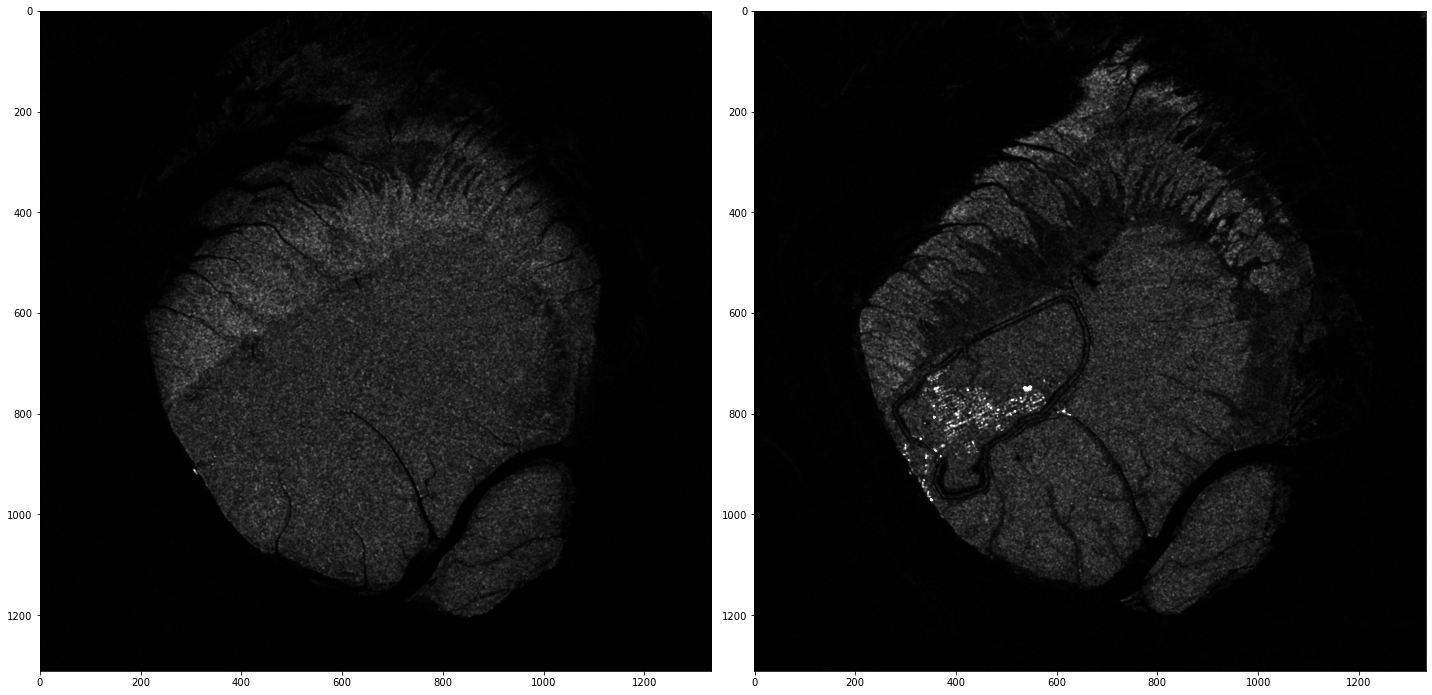

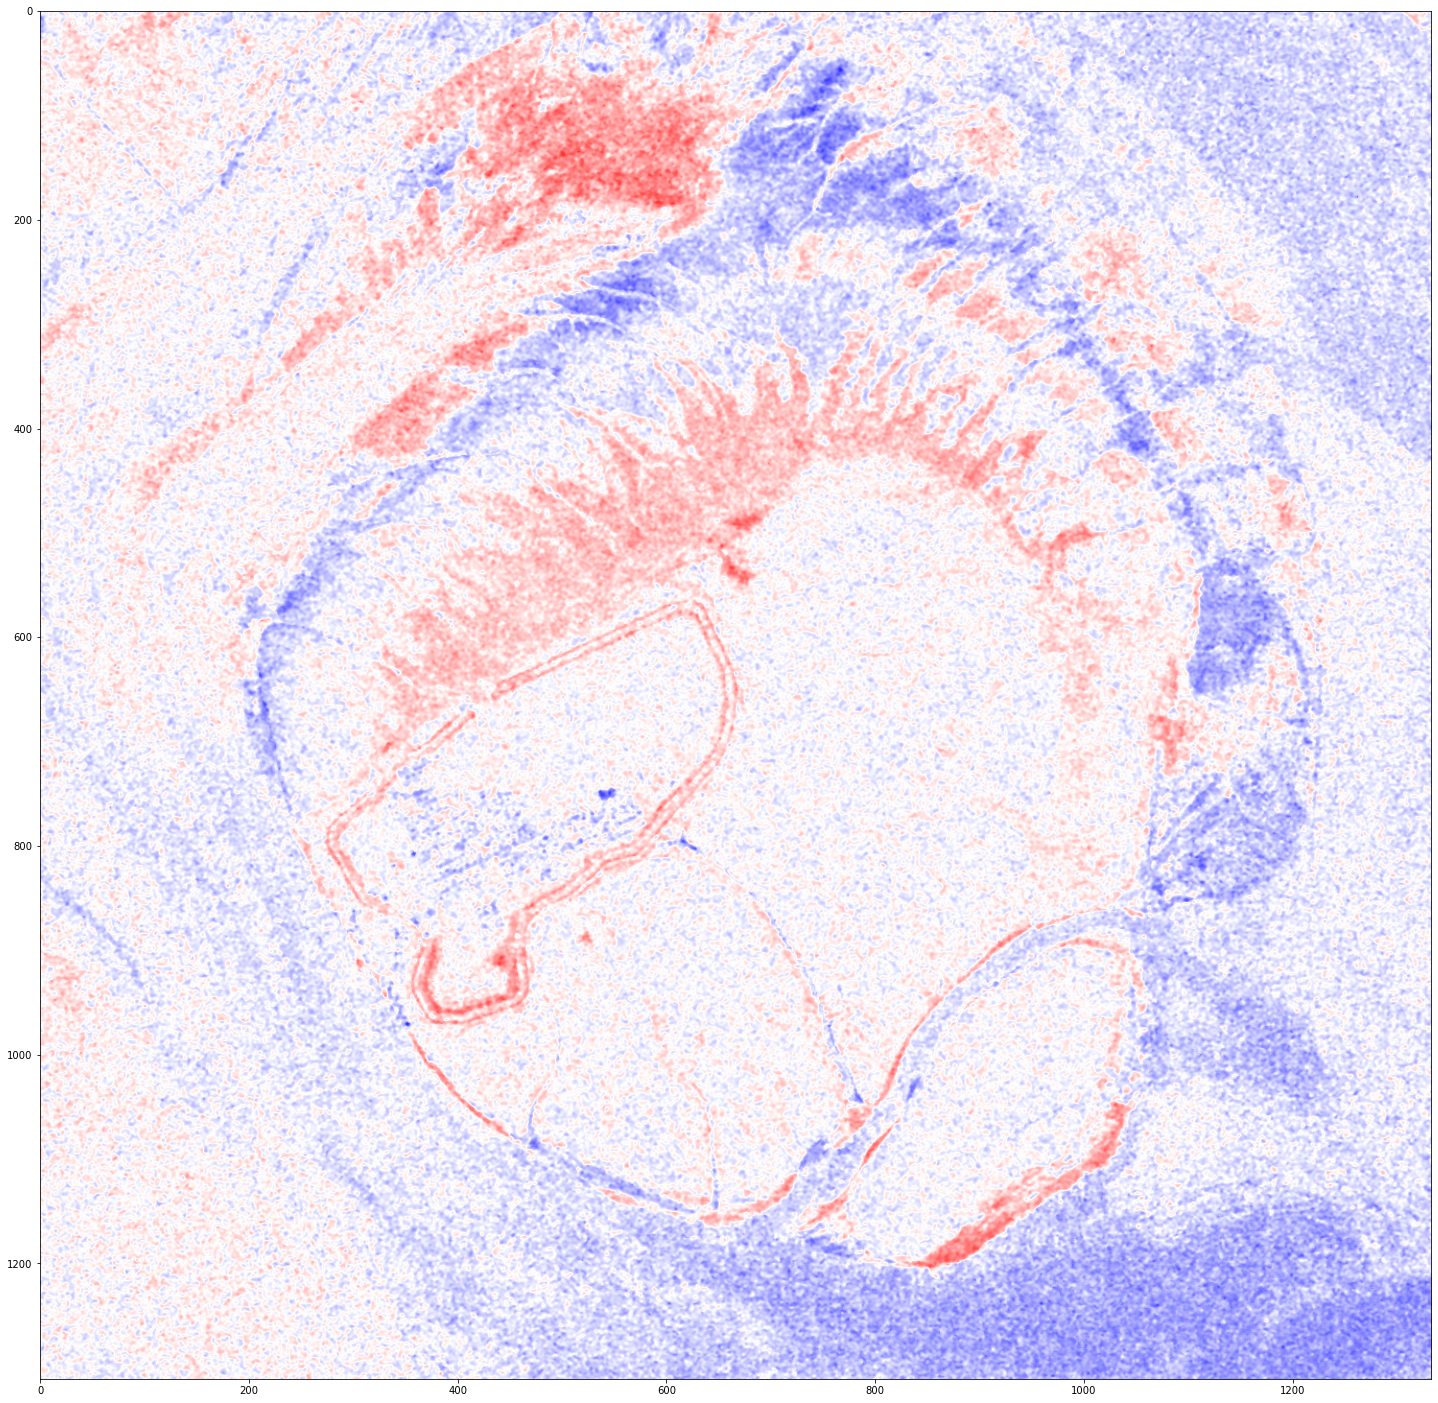

In [17]:
#from papers
charp_data1=load_image('data/backscatterCharpiya20171220.tif')
charp_data2=load_image('data/backscatterCharpiya20180910.tif')
dlr=np.log(charp_data1/charp_data2)
layers = []
layers.append(charp_data1)
layers.append(charp_data2)
#layers.append(dlr)
image = np.dstack(layers)
plot_bands_row(image,vmin=0,vmax=1)
plot_bands_row(dlr,vmin=-4,vmax=4,cmap=plt.cm.bwr)

In [ ]:
#TODO dllr and fusion dlr and dllr

#Proposed exercise binary map of new constructions/floodings